In [1]:
%matplotlib inline
from desc.equilibrium import EquilibriaFamily
from desc.plotting import plot_surfaces,plot_section, plot_2d
from desc.objectives import MagneticWell
from desc.grid import LinearGrid
import numpy as np
import matplotlib.pyplot as plt

DESC version 0.4.13+563.g48bf0af.dirty, using JAX backend, jax version=0.2.25, jaxlib version=0.1.76, dtype=float64
Using device: CPU, with 11.65 GB available memory


In [2]:
# final equilibriums
eq_dshape = EquilibriaFamily.load(load_from='./examples/DESC/DSHAPE_output.h5')[-1]
eq_helio  = EquilibriaFamily.load(load_from='./examples/DESC/HELIOTRON_output.h5')[-1]
eq_axisym = EquilibriaFamily.load(load_from='./examples/DESC/AXISYM_output.h5')[-1]

In [3]:
# make sure equilibrium were solved correctly on my computer
# plot_surfaces(eq_dshape)
# plot_surfaces(eq_helio)
# plot_surfaces(eq_axisym)

Precomputing transforms
DSHAPE
Equilibrium at 0x7f6420041070 (L=26, M=13, N=0, NFP=1.0, sym=1, spectral_indexing=fringe)
volume enclosed by the rho=1 surface: 77.2858274674659
total volume (data['V']): 168.593195468514
well parameter: [0.07241139]

Precomputing transforms
HELIOTRON
Equilibrium at 0x7f640810adf0 (L=24, M=12, N=3, NFP=19.0, sym=1, spectral_indexing=fringe)
volume enclosed by the rho=1 surface: 51.71098578880827
total volume (data['V']): 440.0449133259921
well parameter: [-0.53971351]

Precomputing transforms
AXISYM
Equilibrium at 0x7f63a87cfdc0 (L=40, M=20, N=0, NFP=1.0, sym=1, spectral_indexing=fringe)
volume enclosed by the rho=1 surface: 77.01038750447835
total volume (data['V']): 154.87160079803675
well parameter: [-0.11174273]



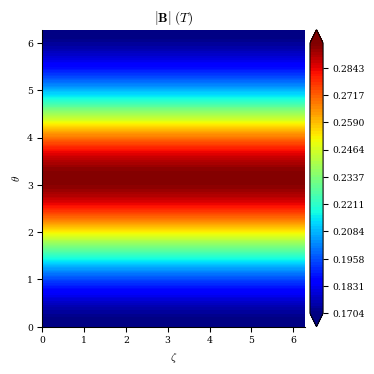

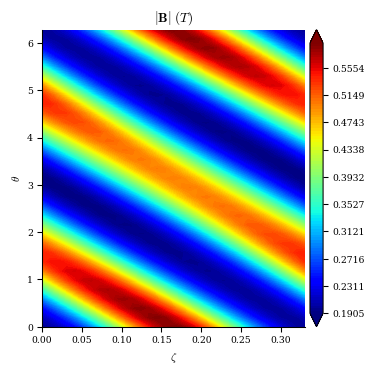

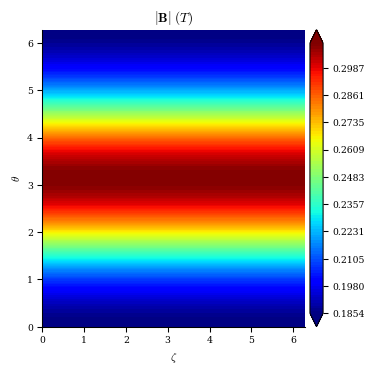

In [4]:
# the volume enclosed by the rho=1 surface should match data["V"], the entire volume, but it doesn't
def compute_rho1(eq, name):
    m = MagneticWell(eq=eq, name=name)  # uses the default grid where rho = 1
    v, v_total, w = m.compute(eq.R_lmn, eq.Z_lmn, eq.L_lmn, eq.p_l, eq.i_l, eq.Psi)
    print(name)
    print(eq)
    print("volume enclosed by the rho=1 surface: " + str(v))
    print("total volume (data['V']): " + str(v_total))
    print("well parameter: " + str(w))
    print()
    plot_2d(eq=eq, name='|B|')

compute_rho1(eq_dshape, "DSHAPE")
compute_rho1(eq_helio, "HELIOTRON")
compute_rho1(eq_axisym, "AXISYM")

In [5]:
# generate data for plots
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
def compute_points(eq, rho):
    values = np.empty(shape=(len(rho), 3))
    for i in range(len(rho)):
        grid = LinearGrid(L=1,
                          M=2 * eq.M_grid + 10,
                          N=2 * eq.N_grid + 10,
                          NFP=eq.NFP,
                          sym=eq.sym,
                          rho=rho[i]
                         )
        m = MagneticWell(eq=eq, grid=grid)
        values[i] = m.compute(eq.R_lmn, eq.Z_lmn, eq.L_lmn, eq.p_l, eq.i_l, eq.Psi)
        
    return values

points = 30
rho = np.linspace(1/points, 1, points)
dshape_values = compute_points(eq_dshape, rho)
helio_values = compute_points(eq_helio, rho)

Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing transforms
Precomputing tra

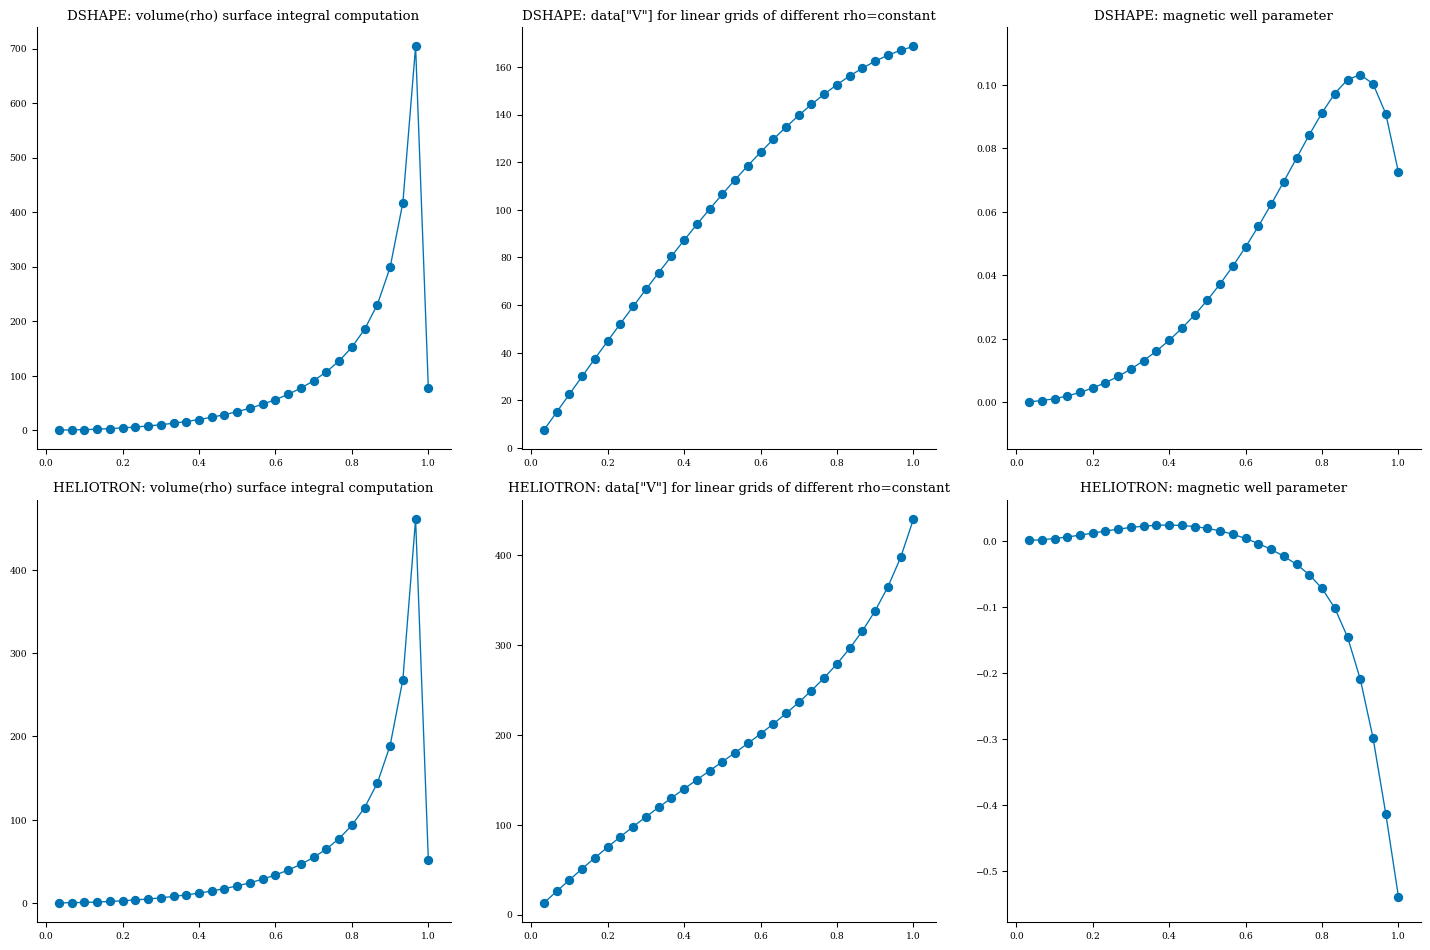

In [6]:
def build_plot(ax, row, rho, values, name):
    ax[row][0].scatter(rho, values[:, 0])
    ax[row][1].scatter(rho, values[:, 1])
    ax[row][2].scatter(rho, values[:, 2])
    ax[row][0].plot(rho, values[:, 0])
    ax[row][1].plot(rho, values[:, 1])
    ax[row][2].plot(rho, values[:, 2])
    ax[row][0].set_title(name + ': volume(rho) surface integral computation')
    ax[row][1].set_title(name + ': data["V"] for linear grids of different rho=constant')
    ax[row][2].set_title(name + ': magnetic well parameter')

fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15, 10)
build_plot(ax, 0, rho, dshape_values, "DSHAPE")
build_plot(ax, 1, rho, helio_values, "HELIOTRON")

![DSHAPE_magwell.png](DSHAPE_magwell.png)

![HELIOTRON_magwell.png](HELIOTRON_magwell.png)

In [7]:
# also what rho=constant surface does MagneticWell return a result for when the rho input for grid is an array?
grid = LinearGrid(M=2 * eq_dshape.M_grid + 10,
                  N=2 * eq_dshape.N_grid + 10,
                  NFP=eq_dshape.NFP,
                  sym=eq_dshape.sym,
                  rho=rho
                 )
m = MagneticWell(eq=eq_dshape, grid=grid)
m.compute(eq_dshape.R_lmn, eq_dshape.Z_lmn, eq_dshape.L_lmn, eq_dshape.p_l, eq_dshape.i_l, eq_dshape.Psi)

Precomputing transforms


(DeviceArray(875.55739993, dtype=float64),
 DeviceArray(102.04053197, dtype=float64),
 DeviceArray([0.05587525], dtype=float64))